# Data Cleaning & Sentiment Analysis with Twitter

**Sentiment Analysis** refers to the use of natural language processing and text analysis to extract, classify, and quantify **subjective** information. In this project, I will extract tweets from Twitter and process this textual data to determine subjectivity and polarity. I can also reproduce the same approach on specific Twitter accounts to classify an individual on a subjective scale. 
<hr>

### Questions 

* What portions of the imported dataset is relevant? 
* What library can we use to label subjectivity and polarity? 
* How many positive, negative, neutral tweets are in the dataset? How about for x account? 
* How can we visualize the quantity and frequency of the textual data? 
* What can we extrapolate or conclude from extracting the subjectivity and polarity of a certain dataset? 


### Imports and Datasets

In [122]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from wordcloud import WordCloud
from textblob import TextBlob

In [8]:
read = pd.read_csv('tweets-1.6.csv', encoding = 'latin1')
read

,TweetID,Date,Query,UserID,Tweet
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...
2994,1468493731,Tue Apr 07 02:00:46 PDT 2009,NO_QUERY,shortyyyy,@ZoeAimee I'm trying to research some dude for...
2995,1468494392,Tue Apr 07 02:00:58 PDT 2009,NO_QUERY,xhardtoforget,"just got up, pshhh going on the trampoline, ev..."
2996,1468494732,Tue Apr 07 02:01:04 PDT 2009,NO_QUERY,amielia_1991,Homework
2997,1468494789,Tue Apr 07 02:01:09 PDT 2009,NO_QUERY,dessey,@pmarnandus re: daily gossip.. well the twitte...


In [9]:
data = read[['Tweet']]
data.columns = ['Tweets']
data

,Tweets
0,is upset that he can't update his Facebook by ...
1,@Kenichan I dived many times for the ball. Man...
2,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all...."
4,@Kwesidei not the whole crew
...,...
2994,@ZoeAimee I'm trying to research some dude for...
2995,"just got up, pshhh going on the trampoline, ev..."
2996,Homework
2997,@pmarnandus re: daily gossip.. well the twitte...


In [10]:
print('Dataset size: ', data.shape)
print('Columns are: ', data.columns)

Dataset size:  (2999, 1)
Columns are:  Index(['Tweets'], dtype='object')


In [11]:
def clean_table(txt): 
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt) #removes @ mentions 
    txt = re.sub(r'#','', txt) #removes hashtags
    txt = re.sub(r'RT[\s]+', '', txt) #removes retweet
    txt = re.sub(r'https?:\/\/\S+', '', txt) #removes hyperlink
    return txt 

In [12]:
data['Tweets'] = data['Tweets'].apply(clean_table)

<ipython-input-12-913b98c6887e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweets'] = data['Tweets'].apply(clean_table)


In [13]:
data

,Tweets
0,is upset that he can't update his Facebook by ...
1,I dived many times for the ball. Managed to s...
2,my whole body feels itchy and like its on fire
3,"no, it's not behaving at all. i'm mad. why am..."
4,not the whole crew
...,...
2994,I'm trying to research some dude for my engli...
2995,"just got up, pshhh going on the trampoline, ev..."
2996,Homework
2997,re: daily gossip.. well the twitter gossips a...


In [19]:
def subjective(txt): 
    #The subjectivity is a float within the range [0.0, 1.0] 
    ## where 0.0 is very objective and 1.0 is very subjective.
    return TextBlob(txt).sentiment.subjectivity 

In [20]:
def polarity(txt):
    #The polarity score is a float within the range [-1.0, 1.0]
    ## where -1 is very negative and 1 is very positive 
    return TextBlob(txt).sentiment.polarity

In [21]:
data['Subjectivity'] = data['Tweets'].apply(subjective)
data['Polarity'] = data['Tweets'].apply(polarity)

<ipython-input-21-1f1cdaab04b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Subjectivity'] = data['Tweets'].apply(subjective)
<ipython-input-21-1f1cdaab04b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Polarity'] = data['Tweets'].apply(polarity)


In [22]:
data

,Tweets,Subjectivity,Polarity
0,is upset that he can't update his Facebook by ...,0.0000,0.000000
1,I dived many times for the ball. Managed to s...,0.5000,0.500000
2,my whole body feels itchy and like its on fire,0.4000,0.200000
3,"no, it's not behaving at all. i'm mad. why am...",1.0000,-0.625000
4,not the whole crew,0.4000,0.200000
...,...,...,...
2994,I'm trying to research some dude for my engli...,0.1875,-0.062500
2995,"just got up, pshhh going on the trampoline, ev...",0.0000,0.000000
2996,Homework,0.0000,0.000000
2997,re: daily gossip.. well the twitter gossips a...,0.2500,0.488281


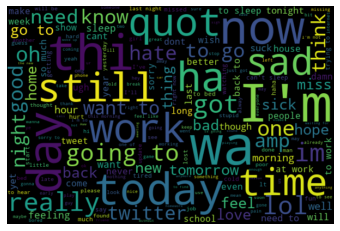

In [35]:
words = ' '.join( [tweets for tweets in data['Tweets']] )
cloud = WordCloud(width=600, height=400, random_state=10,
                  max_font_size=100).generate(words)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
#positive, negative, neutral sentiments 
def sentiment(score):
    if score > 0: 
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [40]:
data['Sentiment'] = data['Polarity'].apply(sentiment)

<ipython-input-40-f887cde708c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Polarity'].apply(sentiment)


In [41]:
data

,Tweets,Subjectivity,Polarity,Sentiment
0,is upset that he can't update his Facebook by ...,0.0000,0.000000,Neutral
1,I dived many times for the ball. Managed to s...,0.5000,0.500000,Positive
2,my whole body feels itchy and like its on fire,0.4000,0.200000,Positive
3,"no, it's not behaving at all. i'm mad. why am...",1.0000,-0.625000,Negative
4,not the whole crew,0.4000,0.200000,Positive
...,...,...,...,...
2994,I'm trying to research some dude for my engli...,0.1875,-0.062500,Negative
2995,"just got up, pshhh going on the trampoline, ev...",0.0000,0.000000,Neutral
2996,Homework,0.0000,0.000000,Neutral
2997,re: daily gossip.. well the twitter gossips a...,0.2500,0.488281,Positive


In [69]:
#how many positive tweets are there? 
sum(data['Sentiment'] == 'Positive')

915

In [62]:
#let's print all of the positive tweets, starting with the most positive to the least positive 

sortPolarity = data.sort_values(by=['Polarity'])
n = 1 

for i in np.arange(sortPolarity.shape[0]):
    if sortPolarity['Sentiment'][i] == 'Positive': 
        print(str(n) + '.' + sortPolarity['Tweets'][i])
        print()
        n = n+1 

1. I dived many times for the ball. Managed to save 50%  The rest go out of bounds

2.my whole body feels itchy and like its on fire 

3. not the whole crew 

4. hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?

5. i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown.

6. ahh ive always wanted to see rent  love the soundtrack!!

7. i was out most of the day so didn't get much done 

8.ooooh.... LOL  that leslie.... and ok I won't do it again so leslie won't  get mad again 

9.some1 hacked my account on aim  now i have to make a new one

10. awe i love you too!!!! 1 am here  i miss you

11.Bed. Class 8-12. Work 12-3. Gym 3-5 or 6. Then class 6-10. Another day that's gonna fly by. I miss my girlfriend 

12.really don't feel like getting up today... but got to study to for tomorrows practical exam... 

13. Awww I soo wish I was there to see you finally comfortable! Im sad that I missed it 

14. Y

In [71]:
data.sort_values(by=['Polarity'], ascending = False)

,Tweets,Subjectivity,Polarity,Sentiment
2572,Wishing you the best! &lt;3,0.3,1.0,Positive
2949,isnt very happy with twitter at the moment.. w...,1.0,1.0,Positive
553,PLEASE TELL ME THAT'S SOMEWHERE CLOSE TO CALI...,0.7,1.0,Positive
477,This is the best leather sofa in the world! I...,0.3,1.0,Positive
833,"Okay, so.. STILL NO SCHOOL!!!!",0.5,1.0,Positive
...,...,...,...,...
2847,oh did you see the disaster? really an horrib...,1.0,-1.0,Negative
966,18 weeks till sisters home.. i missed her call...,1.0,-1.0,Negative
1071,You hate Billy now?!,0.9,-1.0,Negative
1147,Sorting brekkie for the kids then off to the h...,1.0,-1.0,Negative


In [81]:
#let's print all of the negative tweets

sortPolarity = data.sort_values(by=['Polarity'], ascending=False)
n = 1 

for i in np.arange(sortPolarity.shape[0]):
    if sortPolarity['Sentiment'][i] == 'Negative': 
        print(str(n) + '.' + sortPolarity['Tweets'][i])
        print()
        n = n+1 

1. no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 

2.spring break in plain city... it's snowing 

3.I hate when I have to call and wake people up 

4.im sad now  Miss.Lilly

5.ok I'm sick and spent an hour sitting in the shower cause I was too sick to stand and held back the puke like a champ. BED now 

6. ill tell ya the story later  not a good day and ill be workin for like three more hours...

7. sorry! bed time came here (GMT+1)   

8. I don't either. Its depressing. I don't think I even want to know about the kids in suitcases. 

9.Sad, sad, sad. I don't know why but I hate this feeling  I wanna sleep and I still can't!

10.Falling asleep. Just heard about that Tracy girl's body being found. How sad  My heart breaks for that family.

11.is strangely sad about LiLo and SamRo breaking up. 

12. oh! i'm so sorry  i didn't think about that before retweeting.

13.Broadband plan 'a massive broken promise'  via www.diigo.com/~tautao Still w

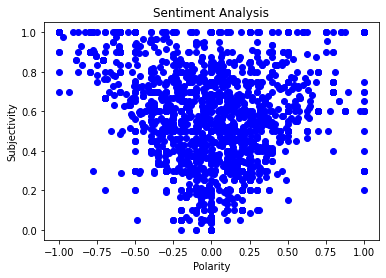

In [119]:
plt.figure()
for i in np.arange(data.shape[0]):
    plt.scatter(data['Polarity'][i], data['Subjectivity'][i], color='blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity')
plt.show()

In [94]:
values = data['Sentiment'].value_counts()

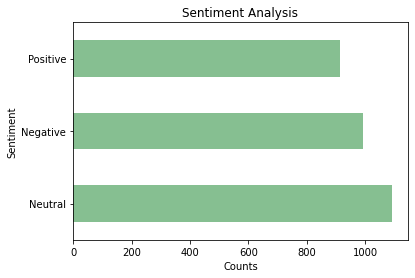

In [121]:
values.plot(kind='barh',  figsize=(6, 4), color='#86bf91', width=0.5)
plt.title('Sentiment Analysis')
plt.ylabel('Sentiment')
plt.xlabel('Counts')
plt.show()